# Extraction of articulation features from audio files

Compute articulation features from continuous speech.

122 descriptors are computed:

- 1 - 22. Bark band energies in onset transitions (22 BBE).
- 23 - 34. Mel frequency cepstral coefficients in onset transitions (12 MFCC onset)
- 35 - 46. First derivative of the MFCCs in onset transitions (12 DMFCC onset)
- 47 - 58. Second derivative of the MFCCs in onset transitions (12 DDMFCC onset)
- 59 - 80. Bark band energies in offset transitions (22 BBE).
- 81 - 92. MFCCC in offset transitions (12 MFCC offset)
- 93 - 104. First derivative of the MFCCs in offset transitions (12 DMFCC offset)
- 105 - 116. Second derivative of the MFCCs in offset transitions (12 DMFCC offset)
- 117 First formant Frequency
- 118 First Derivative of the first formant frequency
- 119 Second Derivative of the first formant frequency
- 120 Second formant Frequency
- 121 First derivative of the Second formant Frequency
- 122 Second derivative of the Second formant Frequency

In addition, static (for all utterance) or dynamic (at-frame level) features can be computed:

- The static feature vector is formed with 488 features (122 descriptors) x (4 functionals: mean, std, skewness, kurtosis)

- The dynamic matrix contains 58 descriptors (22 BBEs, 12 MFCC, 12DMFCC, 12 DDMFCC ) computed for frames of 40 ms of onset segments.

The first two frames of each recording are not considered for dynamic analysis to be able to stack the derivatives of MFCCs

#### Notes:
1. The fundamental frequency is computed the PRAAT algorithm. To use the RAPT method,  change the "self.pitch method" variable in the class constructor.

2. The formant frequencies are computed using Praat


In [1]:
import sys
sys.path.append("../")
from articulation.articulation import Articulation

In [2]:
articulationf=Articulation()
file_audio="../audios/001_ddk1_PCGITA.wav"

## Extract features and return them as a numpy array

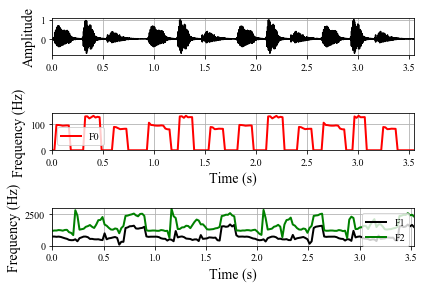

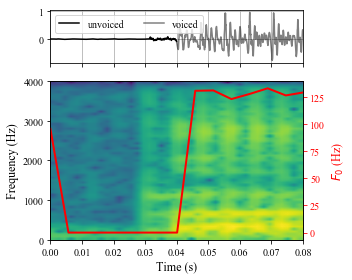

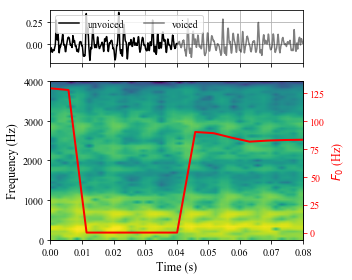

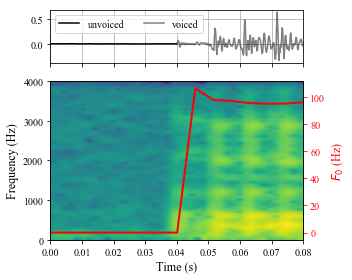

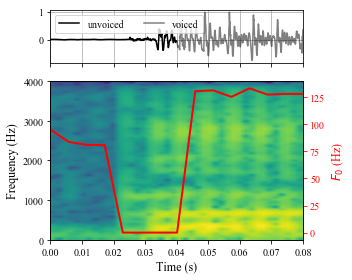

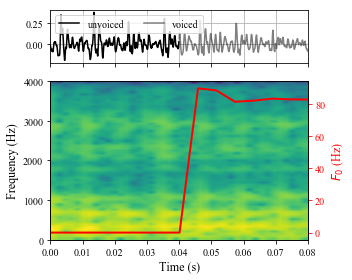

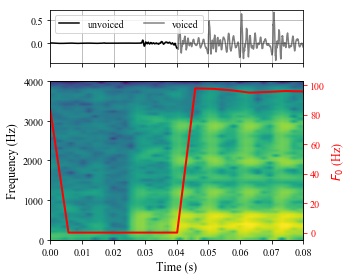

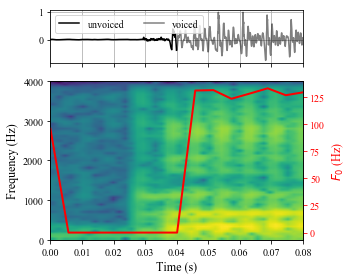

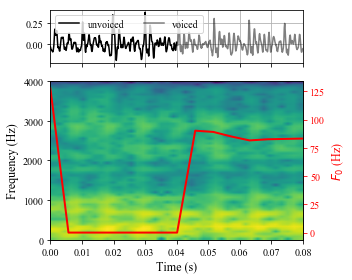

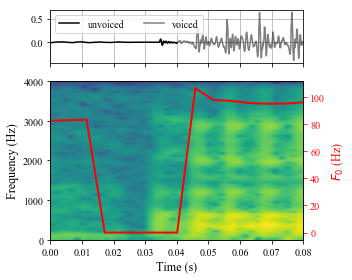

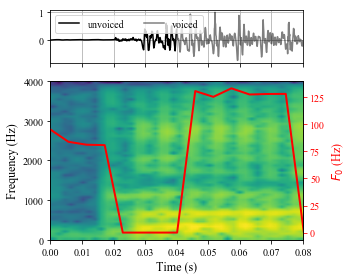

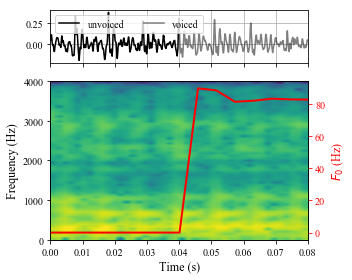

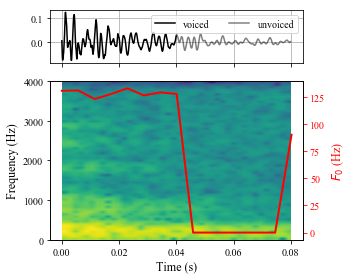

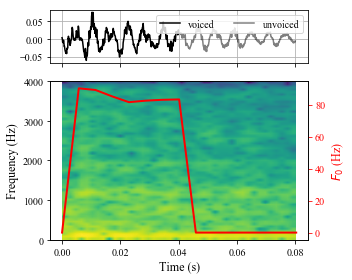

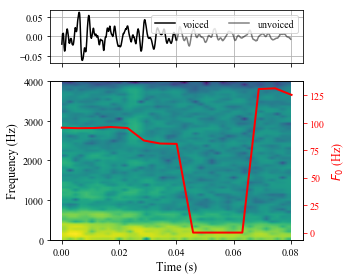

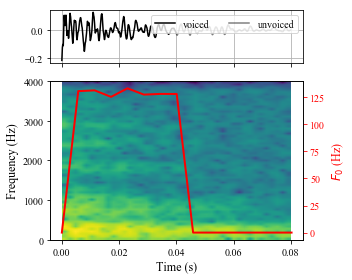

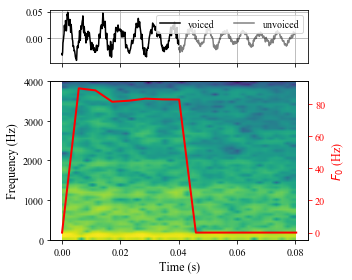

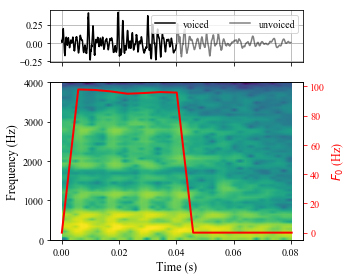

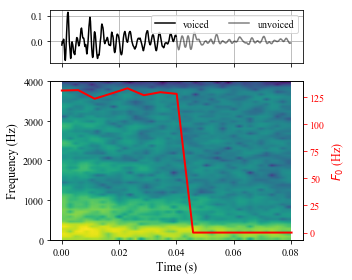

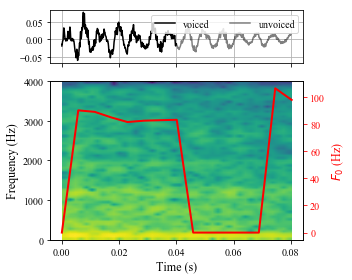

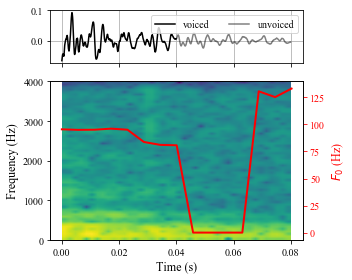

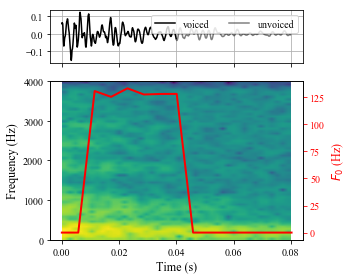

(488,)


In [3]:
features1=articulationf.extract_features_file(file_audio, static=True, plots=True, fmt="npy")
print(features1.shape)

## Extract static features and return them as a dataframe 

In [4]:
features1=articulationf.extract_features_file(file_audio, static=True, plots=False, fmt="csv")
print(features1)

   avg BBEoff_1  avg BBEoff_10  avg BBEoff_11  avg BBEoff_12  avg BBEoff_13  \
0     -2.204463      -3.221418      -3.318075      -3.742802      -4.189852   

   avg BBEoff_14  avg BBEoff_15  avg BBEoff_16  avg BBEoff_17  avg BBEoff_18  \
0      -4.180401      -4.527465      -5.410826      -5.143414      -5.338587   

       ...       std MFCCon_11  std MFCCon_12  std MFCCon_2  std MFCCon_3  \
0      ...            5.392679       7.335233      1.588346      7.063602   

   std MFCCon_4  std MFCCon_5  std MFCCon_6  std MFCCon_7  std MFCCon_8  \
0      6.125959      4.296694      6.428791      5.326909      2.664915   

   std MFCCon_9  
0      5.565584  

[1 rows x 488 columns]


## Extract dynamic features and return them as a dataframe

In [5]:
features1=articulationf.extract_features_file(file_audio, static=False, plots=False, fmt="csv")
print(features1.head())

    BBEon_1  BBEon_10  BBEon_11  BBEon_12  BBEon_13  BBEon_14  BBEon_15  \
0 -1.068936  0.766165  0.788058 -1.205105 -2.078237 -1.042653 -1.653648   
1 -0.889533 -1.123524 -0.602701 -0.872925 -1.018756 -1.848485 -3.505946   
2 -1.546488 -0.611595 -0.545751 -1.681469 -2.954976 -2.718693 -4.549898   
3 -1.628813 -0.922858 -0.776847 -2.596840 -3.039222 -2.734110 -4.563450   
4 -3.692217 -6.094406 -6.220299 -7.144144 -7.180469 -6.953621 -7.000042   

   BBEon_16  BBEon_17  BBEon_18      ...          MFCCon_11     MFCCon_12  \
0 -4.002722 -2.212193 -1.753752      ...       9.256430e+00 -1.737756e+01   
1 -4.510919 -4.340351 -3.944525      ...       7.723259e+00 -9.393289e+00   
2 -5.071241 -5.094444 -4.130714      ...       9.767236e-01 -1.264054e+01   
3 -4.685841 -5.066801 -4.093560      ...      -6.686868e-01 -1.206794e+01   
4 -6.922662 -6.968081 -7.240162      ...      -1.561251e-17 -5.155614e-18   

       MFCCon_2      MFCCon_3      MFCCon_4      MFCCon_5      MFCCon_6  \
0 -3.417699

## Extract dynamic features and return them as a torch tensor

In [6]:
features1=articulationf.extract_features_file(file_audio, static=False, plots=False, fmt="torch")
print(features1.dtype)
print(features1.size())

torch.float64
torch.Size([32, 58])


## Extract static features from a path return them as a numpy array

In [7]:
path_audio="../audios/"
features1=articulationf.extract_features_path(path_audio, static=True, plots=False, fmt="npy")
print(features1.shape)

Processing 098_u1_PCGITA.wav: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]      

(4, 488)
